## Importing Libraries

In [307]:
import numpy as np  # Importing the NumPy library for numerical computations
import matplotlib.pyplot as plt # Importing Matplotlib's pyplot module for data visualization
import pandas as pd  # Importing the pandas library for data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature standardization
from sklearn.model_selection import train_test_split  # Importing train_test_split for dataset splitting
from sklearn.ensemble import RandomForestClassifier # Importing RandomForestClassifier from scikit-learn for random forest classification
from sklearn.model_selection import cross_val_score # Importing cross_val_score from scikit-learn for cross-validation
from sklearn.neighbors import KNeighborsClassifier # Importing KNeighborsClassifier from scikit-learn for k-nearest neighbors classification
from sklearn.ensemble import GradientBoostingClassifier # Importing GradientBoostingClassifier from scikit-learn for gradient boosting classification
from sklearn.linear_model import LogisticRegression # Importing LogisticRegression from scikit-learn for logistic regression classification
from sklearn import svm  # Importing the support vector machine algorithm
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score  # Importing metric scores for model evaluation

## About Dataset

Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

## Data Retrieval and Analysis

In [309]:
data = pd.read_csv("cardio_train.csv") # Reading the CSV file and storing it in a DataFrame named 'data'
data.head() # Displaying the first five rows of the DataFrame

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


The file isnt parsed well as the delimiter hasn not been included so we need to include a delimiter which in this case is the ';'

In [310]:
data = pd.read_csv("cardio_train.csv", delimiter=';') # Reading the CSV file with a specified delimiter and storing it in a DataFrame named 'data'
data.head() # Displaying the first five rows of the DataFrame

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [311]:
data.shape #Gives the number of rows and columns of the dataframe

(70000, 13)

In [312]:
data.describe() #Gives a statistical description of the data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [313]:
data['age'] = data['age'].apply(lambda x: round(x/365)) # Converting the days to years
data.head() # Displaying the first five rows of the loaded data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


This helps give a better description of the age to be used in analysis

In [314]:
mapping = {2: 'male', 1: 'female'} # Define a dictionary to map values
data['gender'] = data['gender'].replace(mapping) # Replace values in 'gender' column
data.head() # Print the updated table 5 top values

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,1,1,0,0,1,0
1,1,55,female,156,85.0,140,90,3,1,0,0,1,1
2,2,52,female,165,64.0,130,70,3,1,0,0,0,1
3,3,48,male,169,82.0,150,100,1,1,0,0,1,1
4,4,48,female,156,56.0,100,60,1,1,0,0,0,0


The mapping of the values in the gender row to their gender equivalent according to the metadata on kaggle gives the data more meaning and hopefully a better analysis could be conducted.

In [315]:
data['cardio'].value_counts() #Counts the frequency of each unique value in the cardio column (Target) of the dataset

0    35021
1    34979
Name: cardio, dtype: int64

The count implies that there is a fair distribution of individuals with cardiac diseases and those that dont.

In [316]:
data.dtypes # Checking the data types of values under each column in the dataset

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [317]:
null_values = data.isnull().sum() #This checks for missing values in the dataframe
null_values #Displays the null values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [318]:
data['gender'].value_counts() #Counts the frequency of each unique value in the gender column of the dataset

female    45530
male      24470
Name: gender, dtype: int64

This shows some sort of bias in the dataset as we have almost 2x the number of females involved in the dataset than males leading to an under-representation of the male population in the dataset

In [319]:
data.rename(columns = {"ap_hi": "sys"}, inplace = True) #Renames the ap_hi column to its proper tag 'sys' which is short for systolic
data.rename(columns = {"ap_lo": "dia"}, inplace = True) #Renames the ap_lo column to its proper tag 'dia' which is short for diatolic
data.head() #Displays first five values of the new table

,id,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,1,1,0,0,1,0
1,1,55,female,156,85.0,140,90,3,1,0,0,1,1
2,2,52,female,165,64.0,130,70,3,1,0,0,0,1
3,3,48,male,169,82.0,150,100,1,1,0,0,1,1
4,4,48,female,156,56.0,100,60,1,1,0,0,0,0


The relabelling of the ap_hi and ap_lo coumns to sys and dia respectively gives a better understanding of what the values represent in the dataset and also helps during analysis

In [320]:
# Converts  the values in the height column which are currently in centimeters according to the metadata to meters 
data['height'] = data['height'] / 100
data.head()

,id,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55,female,1.56,85.0,140,90,3,1,0,0,1,1
2,2,52,female,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48,male,1.69,82.0,150,100,1,1,0,0,1,1
4,4,48,female,1.56,56.0,100,60,1,1,0,0,0,0


The reason for the conversion is to help in the calculation of a body mass index(BMI) which is calculated as the weight(kg)/height2(m2)

In [321]:
data['bmi'] = data['weight'] / ((data['height'])**2) # Calculating the body mass index (BMI) using weight and height columns
data['bmi'] = data['bmi'].round(1) # Rounding the BMI values to one decimal place
data.head() # Displaying the first five rows of the updated DataFrame

,id,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,male,1.68,62.0,110,80,1,1,0,0,1,0,22.0
1,1,55,female,1.56,85.0,140,90,3,1,0,0,1,1,34.9
2,2,52,female,1.65,64.0,130,70,3,1,0,0,0,1,23.5
3,3,48,male,1.69,82.0,150,100,1,1,0,0,1,1,28.7
4,4,48,female,1.56,56.0,100,60,1,1,0,0,0,0,23.0


In [322]:
# Define BMI ranges and corresponding classes

bmi_ranges = [
    (data["bmi"] <= 17.5),                                 # 0 - Anorexic
    (data["bmi"] > 17.5) & (data["bmi"] < 18.5),           # 1 - Underweight
    (data["bmi"] >= 18.5) & (data["bmi"] <= 24.9),         # 2 - Normal weight
    (data["bmi"] >= 25.0) & (data["bmi"] <= 29.9),         # 3 - Overweight
    (data["bmi"] >= 30.0) & (data["bmi"] <= 34.9),         # 4 - Obesity Class I
    (data["bmi"] >= 35.0) & (data["bmi"] <= 39.9),         # 5 - Obesity Class II
    (data["bmi"] >= 40.0)                                  # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

data["bmi_class"] = np.select(bmi_ranges, classes) # Assign BMI class to each data point using np.select()
data.head() # Displaying the first few rows of the updated DataFrame

,id,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class
0,0,50,male,1.68,62.0,110,80,1,1,0,0,1,0,22.0,2
1,1,55,female,1.56,85.0,140,90,3,1,0,0,1,1,34.9,4
2,2,52,female,1.65,64.0,130,70,3,1,0,0,0,1,23.5,2
3,3,48,male,1.69,82.0,150,100,1,1,0,0,1,1,28.7,3
4,4,48,female,1.56,56.0,100,60,1,1,0,0,0,0,23.0,2


In [323]:
# This defines a function that divides the population into those with a high blood pressure and those without one
def assign_blood_pressure(row):
    sys = row['sys']
    dia = row['dia']

    if sys <= 140 and dia <= 90:
        return 0
    else:
        return 1


# Apply the 'assign_blood_pressure' function to each row of the DataFrame
# and assign the resulting values to a new column named 'blood pressure'
data['blood pressure'] = data.apply(assign_blood_pressure, axis=1)

# Display the first five rows of the updated DataFrame
data.head()

,id,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,blood pressure
0,0,50,male,1.68,62.0,110,80,1,1,0,0,1,0,22.0,2,0
1,1,55,female,1.56,85.0,140,90,3,1,0,0,1,1,34.9,4,0
2,2,52,female,1.65,64.0,130,70,3,1,0,0,0,1,23.5,2,0
3,3,48,male,1.69,82.0,150,100,1,1,0,0,1,1,28.7,3,1
4,4,48,female,1.56,56.0,100,60,1,1,0,0,0,0,23.0,2,0


The addition of the blood pressure column to the column helps provide better insight into the dataset using the WHO standard of non-hypertensive (<=140/90)

In [324]:
data['blood pressure'].unique() #Ensuring we dont have a NaN value in the blood pressure column

array([0, 1])

In [325]:
data['sys'].unique() #Getting a picture of the unique values in the systolic column

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

The values here show that the data needs some cleaning with negative values and values that seem outrageous for a systolic value

In [326]:
data['dia'].unique() #Getting a picture of the unique values in the diastolic column

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,  2088,    20,   802,
        8000,  1022,   850,   708,    57,   101,  9011,  1011,    64,
        1007,  1177,  7100,    45,   709,  8500,    58,  1110,  8099,
        1088,   126,  1077,  1120,     7,   103,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         114,   801,  1002,    53,   111,     1,   118,    56,   182,
         810,     9,

Same as the systolic values the values in the diastolic column would require some cleaning

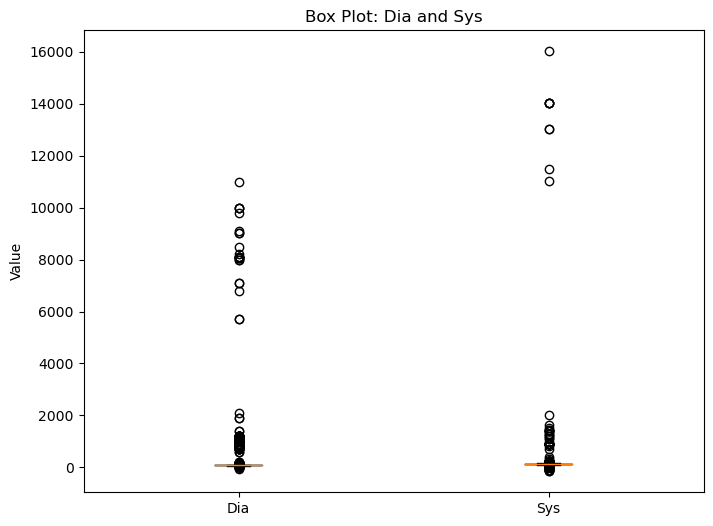

In [327]:
# Checking the distribution for outliers

# Creating box plots for 'dia' and 'sys' columns
plt.figure(figsize=(8, 6)) # Create a new figure with a specific size
plt.boxplot([data['dia'], data['sys']]) # Create a box plot for 'dia' and 'sys' columns
plt.xticks([1, 2], ['Dia', 'Sys']) # Set the x-axis tick labels
plt.ylabel('Value') # Set the y-axis label
plt.title('Box Plot: Dia and Sys') # Set the plot title
plt.show() # Display the plot

In [328]:
# Function to remove the numbers after the third digit in a value
def remove_after_third_digit(number):
    if number and len(str(number)) > 3:
        return int(str(number)[:3])
    return number

# Apply the function to 'sys' and 'dia' columns
data['sys'] = data['sys'].apply(remove_after_third_digit)
data['dia'] = data['dia'].apply(remove_after_third_digit)

# Print the updated table
data.head()

,id,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,blood pressure
0,0,50,male,1.68,62.0,110,80,1,1,0,0,1,0,22.0,2,0
1,1,55,female,1.56,85.0,140,90,3,1,0,0,1,1,34.9,4,0
2,2,52,female,1.65,64.0,130,70,3,1,0,0,0,1,23.5,2,0
3,3,48,male,1.69,82.0,150,100,1,1,0,0,1,1,28.7,3,1
4,4,48,female,1.56,56.0,100,60,1,1,0,0,0,0,23.0,2,0


The idea behind removing values after the third value in the sys and dia columns is that there is no possilbilty of having a systolic or diastolic value that is more than 3 values

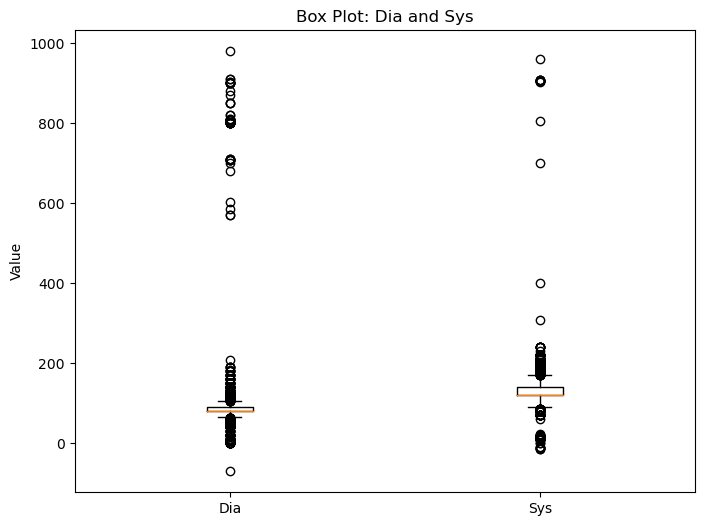

In [329]:
# Checking the distribution for outliers

# Creating box plots for 'dia' and 'sys' columns
plt.figure(figsize=(8, 6))
plt.boxplot([data['dia'], data['sys']])
plt.xticks([1, 2], ['Dia', 'Sys'])
plt.ylabel('Value')
plt.title('Box Plot: Dia and Sys')
plt.show()

The box plot above was plotted to visualize the distribution of values for the sys and dia columns in order to carry out further cleaning

In [330]:
data['sys'].unique() #Getting a picture of the unique values in the systolic column

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125,  90, 180, 160,
       133, 190,  80, 122, 169, 126, 158, 200,  14, 123,  70, 161, 147,
       115, 137, 153,  11, 148, 105, 220, 119, 141, 165, 164,  12, 124,
       172, 902, 162, 906, 117, 134, 166, 210, 176, 116,  10, 121,  16,
       112, 159, 113, 118, 155, 142, 131, 157, 136, 146, 138, -10, 909,
       109,  85, 106, 129,  93,   7,  95, 179, 156, 168, 132, 104, 103,
       178, 175, 128, 151,  15, 139, 127,  17, 108, 144, 102,   1,  13,
       143, 701, 107, 184, 149, 167, 114, 101,  60, 181, 171, 202, -11,
       111, 907,  20, 188, 185, 163, 173, 154, 177, -14, 174, -12, 240,
       191, 197, 152,  96, 199, -15, 193,  99, 196, 309, 401, 806, 230,
       207, 215,  97,  24, 960, 195, 187])

In [331]:
data['dia'].unique() #Getting a picture of the unique values in the diastolic column

array([ 80,  90,  70, 100,  60,  85,  89, 110,  65,  63,  79, 800, 120,
        50,  30, 109,  84, 103, 150,  91,  40,  73,  78,  75,  86,  87,
        82,  95,  69,  74,  97,  81,  83, 119,   0,  93, 105,  99,  77,
        59, 804, 140,  92, 104, 108, 125, 115,  68,  61, 106, 102,  94,
        66,  52, 170,  76, 160,  62,  96, 130, 113,  67, 910,  10,  88,
       902,   8, 112,  71,  72,  98, 208,  20, 802, 850, 708,  57, 101,
       901,  64, 117, 710,  45, 709,  58, 111, 809, 126, 107,   7, 180,
       121, 810, 570, 807,   6, 190, 114, 801,  53,   1, 118,  56, 182,
         9, 980, 820,  55, 900, 122, 680, 135, 700,  15, -70,  54, 880,
       870, 585,  49, 602])

The unique values show that we have negative values, single values and numbers that are also not clinically possible such as numbers above 400

In [332]:
# Drop rows with negative or single-digit 'sys' or 'dia' values
data = data[(data['sys'] > 9) & (data['dia'] > 9)]

In [333]:
data['sys'].unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125,  90, 180, 160,
       133, 190,  80, 122, 169, 126, 158, 200,  14, 123,  70, 161, 147,
       115, 137, 153,  11, 148, 105, 220, 119, 141, 165, 164,  12, 124,
       172, 902, 162, 117, 134, 166, 210, 176, 116,  10, 121,  16, 112,
       159, 113, 118, 155, 142, 131, 157, 136, 146, 138, 909, 109,  85,
       106, 129,  93,  95, 179, 156, 168, 132, 104, 103, 178, 175, 128,
       151,  15, 139, 127,  17, 108, 144, 102,  13, 143, 701, 107, 184,
       149, 167, 114, 101,  60, 181, 171, 202, 111, 907,  20, 188, 185,
       163, 173, 154, 177, 174, 240, 191, 197, 152,  96, 199, 193,  99,
       196, 401, 906, 230, 207, 215,  97,  24, 960, 195, 187])

In [334]:
data['dia'].unique()

array([ 80,  90,  70, 100,  60,  85,  89, 110,  65,  63,  79, 800, 120,
        50,  30, 109,  84, 103, 150,  91,  40,  73,  78,  75,  86,  87,
        82,  95,  69,  74,  97,  81,  83, 119,  93, 105,  99,  77,  59,
       804, 140,  92, 104, 108, 125, 115,  68,  61, 106, 102,  94,  66,
        52, 170,  76, 160,  62,  96, 130, 113,  67, 910,  10,  88, 902,
       112,  71,  72,  98,  20, 802, 850, 708,  57, 101, 901,  64, 117,
       710,  45, 709,  58, 111, 809, 126, 107, 180, 121, 810, 570, 807,
       190, 114, 801,  53, 118,  56, 182, 980, 820,  55, 900, 122, 680,
       135, 700,  15,  54, 880, 870, 585,  49, 602])

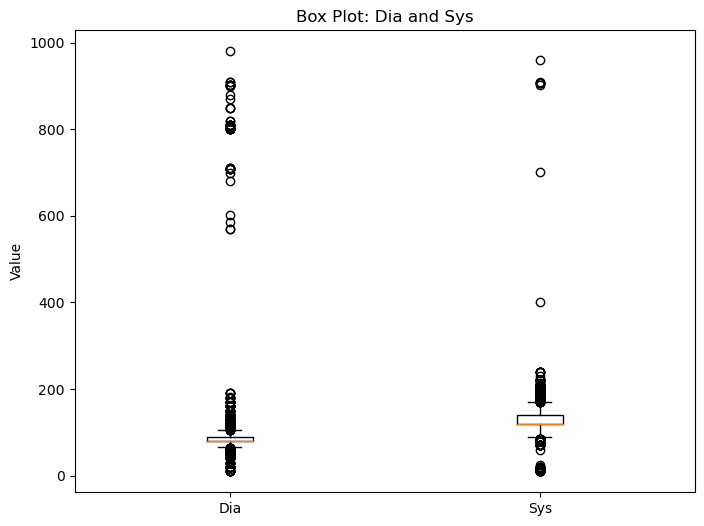

In [335]:
# Checking the distribution for outliers

# Creating box plots for 'dia' and 'sys' columns
plt.figure(figsize=(8, 6))
plt.boxplot([data['dia'], data['sys']])
plt.xticks([1, 2], ['Dia', 'Sys'])
plt.ylabel('Value')
plt.title('Box Plot: Dia and Sys')
plt.show()

In [336]:
# Filtering the 'data' DataFrame based on conditions for 'sys' and 'dia' values
data = data[(data['sys'] > 60) & (data['dia'] > 40)] 

This sets a lower limit for both the sys and dia columns effectively taking out numbers that seem not clinically possible. Note: This is open to contest. Hahaha

In [337]:
# Filtering the 'data' DataFrame based on conditions for 'sys' and 'dia' values
data = data[(data['sys'] < 300) & (data['dia'] < 300)]

This sets an upper limit for the sys and dia columns also taking out seemingly clinically impossible values. 

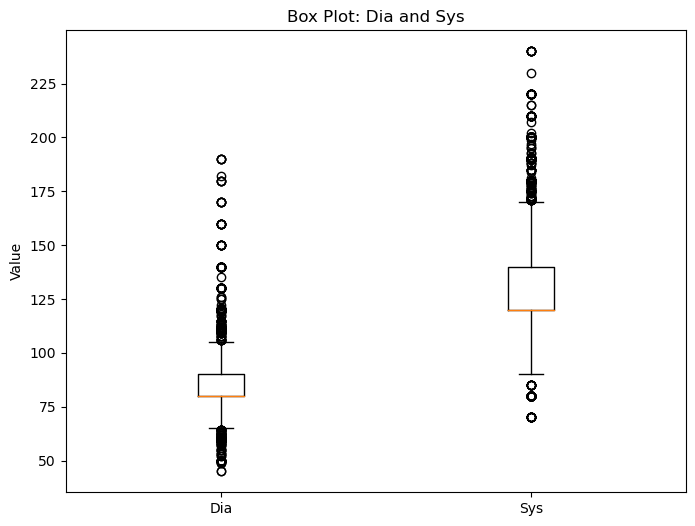

In [338]:
# Checking the distribution for outliers

# Creating box plots for 'dia' and 'sys' columns
plt.figure(figsize=(8, 6))
plt.boxplot([data['dia'], data['sys']])
plt.xticks([1, 2], ['Dia', 'Sys'])
plt.ylabel('Value')
plt.title('Box Plot: Dia and Sys')
plt.show()

At this point I fell confident working with these numbers 

In [339]:
data.shape #Getting an idea of the finally cleaned dataframe

(69682, 16)

This shows that just under 400 rows were dropped from an original 70000 which seems negligible at this point


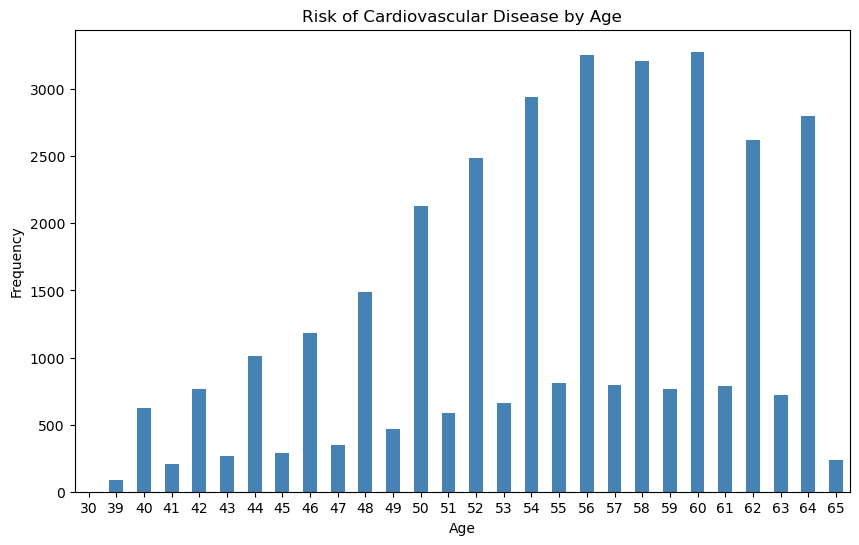

In [340]:
# Group the dataframe by 'age' and calculate the frequency of cardiovascular disease presence
age_groups = data.groupby('age')['cardio'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6)) # Create a new figure with a specific size
age_groups.plot(kind='bar', color='steelblue') # Create a new figure with a specific size
plt.xlabel('Age') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.title('Risk of Cardiovascular Disease by Age') # Set the plot title
plt.xticks(rotation=0) # Rotate the x-axis tick labels to avoid overlapping
plt.show() # Display the plot

The visualization shows a constant increase in the risk of a cardiovascular disease as the individual ages. 

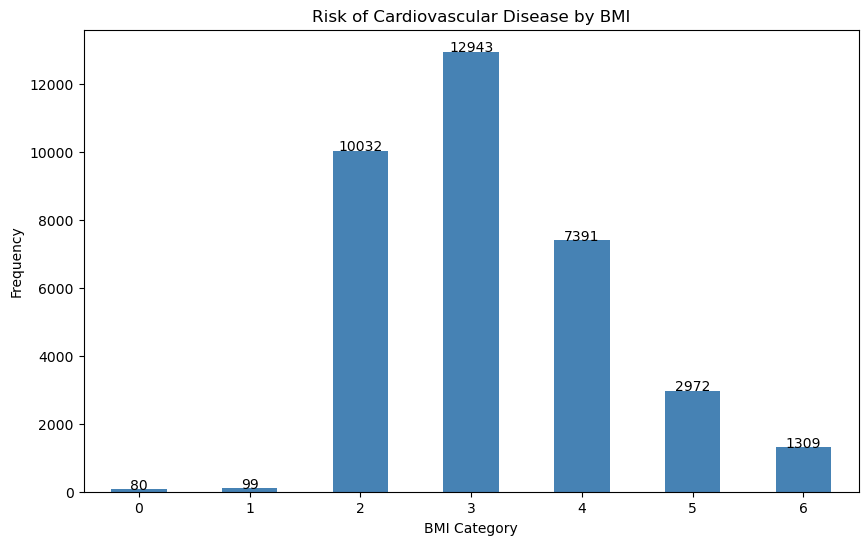

In [341]:
# Group the dataframe by 'bmi_class' and calculate the frequency of cardiovascular disease presence
bmi_groups = data.groupby('bmi_class')['cardio'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6)) # Create a new figure with a specific size
ax = bmi_groups.plot(kind='bar', color='steelblue') # Create a bar plot using the 'bmi_groups' data
bmi_groups.plot(kind='bar', color='steelblue') # Set the x-axis label
plt.xlabel('BMI Category') # Set the y-axis label
plt.ylabel('Frequency') # Set the plot title
plt.title('Risk of Cardiovascular Disease by BMI') # Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=0) # Add count labels on top of each bar

# Add count labels on top of each bar
for i, v in enumerate(bmi_groups):
    ax.text(i, v + 0.1, str(v), ha='center')
    
plt.show() # Display the plot

Although the visualization displays lower numbers of individuals that are anorexic and underweight the analysis could be biased as the population collected in the dataset might have had more of the other classes as indicated below.

In [346]:
data['bmi_class'].value_counts()

3    25438
2    25078
4    12256
5     4388
6     1896
1      348
0      278
Name: bmi_class, dtype: int64

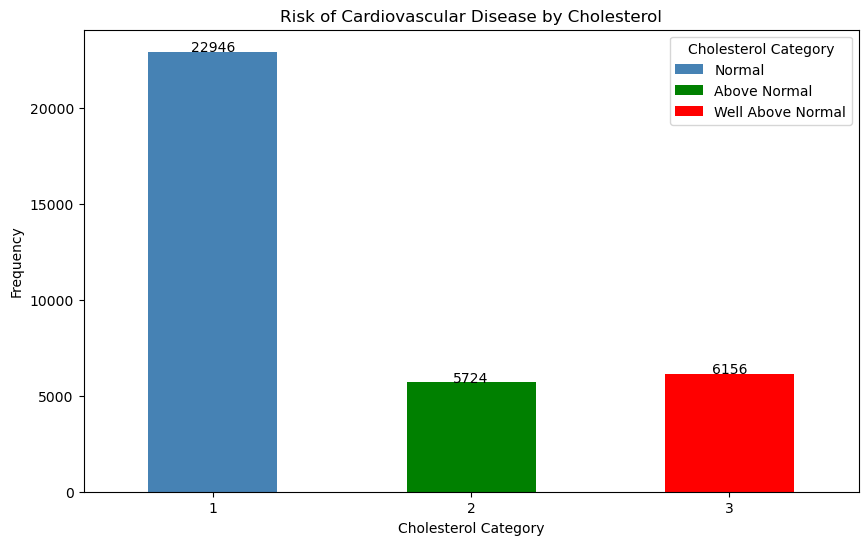

In [357]:
from matplotlib.patches import Patch

# Grouping the data by cholesterol category and calculating the sum of 'cardio' values
cholesterol_groups = data.groupby('cholesterol')['cardio'].sum()

# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Define the bar colors for each cholesterol value
colors = ['steelblue', 'green', 'red']

# Create a bar plot using the 'cholesterol_groups' data and the specified colors
ax = cholesterol_groups.plot(kind='bar', color=colors)

# Set the x-axis label
plt.xlabel('Cholesterol Category')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the plot title
plt.title('Risk of Cardiovascular Disease by Cholesterol')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=0)

# Add count labels on top of each bar
for i, v in enumerate(cholesterol_groups):
    ax.text(i, v + 0.1, str(v), ha='center')

# Define the legend labels and handles with the desired colors
legend_labels = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
legend_handles = [Patch(facecolor=color, label=label) for color, label in zip(colors, legend_labels.values())]

# Create the legend for the cholesterol categories
plt.legend(handles=legend_handles, title='Cholesterol Category')

# Display the plot
plt.show()

The values indicate that there is a high number of individuals with a normal cholesterol but have a cardiovascular disease but it could also be a bias in data collection indicated by the below count which clearly shows that the dataset contains a largely higher number of individuals with a normal cholesterol value.

In [358]:
data['cholesterol'].value_counts()

1    52134
2     9505
3     8043
Name: cholesterol, dtype: int64

<Figure size 1000x600 with 0 Axes>

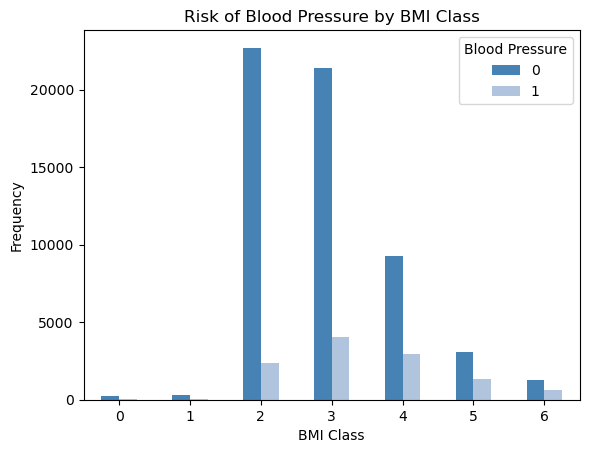

In [97]:
# Group the dataframe by 'bmi_class' and 'blood pressure' and calculate the frequency
bmi_bp_groups = data.groupby(['bmi_class', 'blood pressure']).size().unstack()

# Create the bar chart
plt.figure(figsize=(10, 6))
bmi_bp_groups.plot(kind='bar', stacked=False, color=['steelblue', 'lightsteelblue'])
plt.xlabel('BMI Class')
plt.ylabel('Frequency')
plt.title('Risk of Blood Pressure by BMI Class')
plt.xticks(rotation=0)
plt.legend(title='Blood Pressure', loc='upper right')
plt.show()

In [360]:
# counting the number of value types in the active column where 1 stands for active and 0 stands for inactive
data['active'].value_counts() 

1    56011
0    13671
Name: active, dtype: int64

The numbers above show that individuals that were asked if they were active or not mostly said they were and this data may not be reliable as it is subjective data.

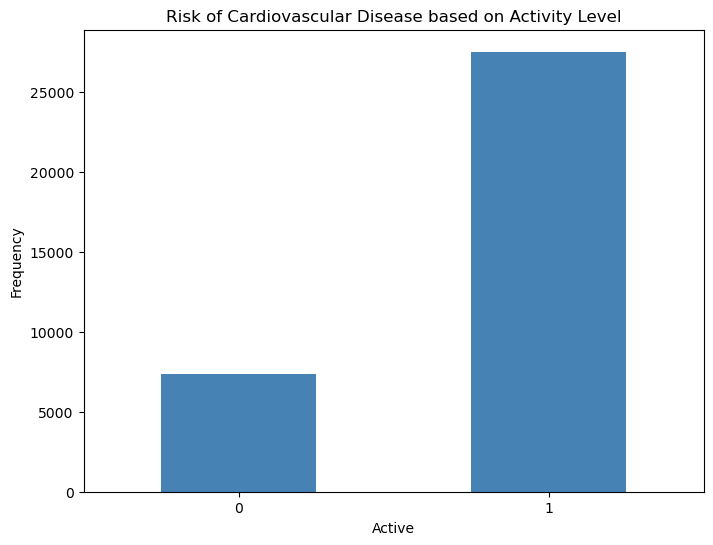

In [361]:
# Group the dataframe by 'active' and calculate the frequency of cardiovascular disease presence
active_groups = data.groupby('active')['cardio'].sum()

# Create the bar chart
plt.figure(figsize=(8, 6)) # Create a new figure with a specific size
active_groups.plot(kind='bar', color='steelblue') # Create a bar chart using the 'active_groups' data
plt.xlabel('Active') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.title('Risk of Cardiovascular Disease based on Activity Level') # Set the plot title
plt.xticks(rotation=0) # Rotate the x-axis tick labels to avoid overlapping
plt.show() # Display the plot

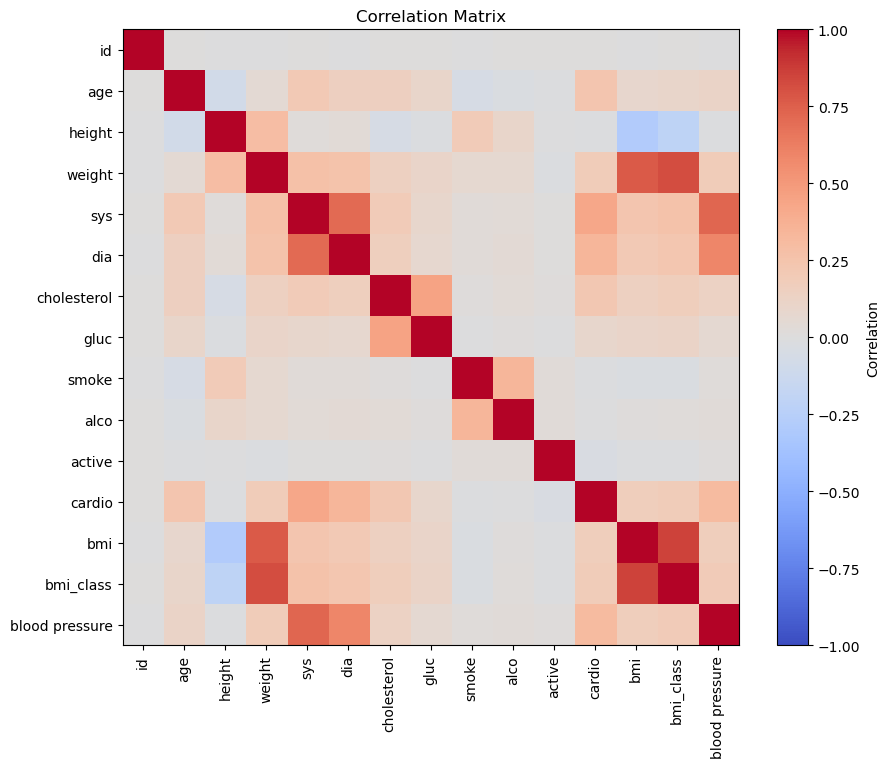

In [362]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) # Create a new figure with a specific size
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1) # Create the heatmap using the correlation matrix
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90) # Set the x-axis tick labels and rotation
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns) # Set the y-axis tick labels
plt.colorbar(label='Correlation') # Add a colorbar and label
plt.title('Correlation Matrix') # Set the plot title
plt.show() # Display the plot

## Creation of Dataframe for Machine Learning 

In [363]:
# Drop the 'index' and 'id' columns
data_learning = data.drop([ 'id'], axis=1)

# Print the modified DataFrame
data_learning.head()

,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,blood pressure
0,50,male,1.68,62.0,110,80,1,1,0,0,1,0,22.0,2,0
1,55,female,1.56,85.0,140,90,3,1,0,0,1,1,34.9,4,0
2,52,female,1.65,64.0,130,70,3,1,0,0,0,1,23.5,2,0
3,48,male,1.69,82.0,150,100,1,1,0,0,1,1,28.7,3,1
4,48,female,1.56,56.0,100,60,1,1,0,0,0,0,23.0,2,0


The id column is dropped as it is insignificant to the target and only stands for patient id

In [364]:
# Map 'gender' column values to integers
gender_mapping = {'male': 2, 'female': 1}
data_learning['gender'] = data_learning['gender'].map(gender_mapping)

# Print the modified DataFrame
data_learning.head()

,age,gender,height,weight,sys,dia,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,blood pressure
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,22.0,2,0
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34.9,4,0
2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23.5,2,0
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28.7,3,1
4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23.0,2,0


The gender column values are mapped back to their original format for the machine to better understand and implement as a variable

In [365]:
X = data_learning.drop(columns='cardio', axis=1)  # Create X by dropping the 'cardio' column from 'data_learning'
Y = data_learning['cardio']  # Assign the 'cardio' column as the target variable Y

## Data Standardization

In [366]:
scaler = StandardScaler()  # Create an instance of the StandardScaler class
scaler.fit(X)  # Fit the scaler to the data in X, calculating the mean and standard deviation for each feature
standardized_data = scaler.transform(X)  # Standardize the features in X using the fitted scaler
X = standardized_data  # Assign the standardized features to the variable X

The StandardScaler is a preprocessing technique that standardizes features by subtracting the mean and scaling to unit variance. It is commonly used to normalize the input data before training a machine learning model.

## Splitting into Train and Test Data

In [367]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

The train_test_split function is used to split the data into training and testing sets. It takes the input features 'X' and the target variable 'Y' as its first two arguments.

The 'test_size' parameter is set to 0.2, which means that 20% of the data will be allocated for testing, while the remaining 80% will be used for training.

The 'stratify' parameter is set to 'Y', which ensures that the class distribution in the original data is preserved in the training and testing sets. This is important when dealing with imbalanced datasets, where the target variable has unequal proportions of different classes.

The 'random_state' parameter is set to 2, which ensures reproducibility of the random sampling. Using the same random state value will yield the same split of data each time the code is executed.

The function returns four sets of data: 'X_train' (training set input features), 'X_test' (testing set input features), 'Y_train' (training set target variable), and 'Y_test' (testing set target variable). These sets can be used for training and evaluating machine learning models, ensuring that the data is split consistently between different runs.

In [369]:
print(X.shape, X_train.shape, X_test.shape)# Getting a picture of the split data by looking at the munber of rows and columns

(69682, 14) (55745, 14) (13937, 14)


In [370]:
model_dict = {} # This dictionary saves the accuracies of each model created for further evaluation

## Training the Model

In [371]:
classifier = svm.SVC(kernel='linear')  # Create an SVM classifier with a linear kernel
classifier.fit(X_train, Y_train)  # Fit the classifier to the training data

SVC(kernel='linear')

This trains the SVM model on the provided training data, allowing it to learn the patterns and relationships between the features and the corresponding class labels.

After executing this code, the SVM classifier is trained and ready to make predictions on new, unseen data.

##  SVM Model Evaluation

In [372]:
# Accuracy score on train data
X_train_prediction = classifier.predict(X_train)  # Predict the labels for the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)  # Calculate the accuracy of the predictions
training_data_accuracy  # Print the accuracy of the predictions

0.7282985021078123

In [373]:
#Accuracy score on test data
X_test_prediction = classifier.predict(X_test) # Predict the labels for the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) # Calculate the accuracy of the predictions
accuracy_svm = test_data_accuracy  # Print the accuracy of the predictions
model_dict['SVM'] = accuracy_svm # Adds the SVM Model's accuarcy to the dictionary
accuracy_svm

0.7231111430006457

In [374]:
# Precision Score on train data
training_data_precision = precision_score(X_train_prediction, Y_train)
training_data_precision

0.6475000897311655

In [375]:
# Precision Score on test data
test_data_precision = precision_score(X_test_prediction, Y_test)
test_data_precision

0.6384781048097631

In [376]:
# f1 score on train data
training_data_f1 = f1_score(X_train_prediction, Y_train)
training_data_f1

0.70432983250693

In [377]:
# f1 score on test data
test_data_f1 = f1_score(X_test_prediction, Y_test)
test_data_f1

0.6974045322669176

In [378]:
# recall score on train data
training_data_recall = recall_score(X_train_prediction, Y_train)
training_data_recall

0.772095013909694

In [379]:
# recall score on test data
test_data_recall = recall_score(X_test_prediction, Y_test)
test_data_recall

0.7683137525915688

## Random Forest Classifier Model

In [380]:
X = data_learning.drop(columns='cardio', axis=1)  # Create X by dropping the 'cardio' column from 'data_learning'
Y = data_learning['cardio']  # Assign the 'cardio' column as the target variable Y

In [381]:
scaler = StandardScaler()  # Create an instance of the StandardScaler class
scaler.fit(X)  # Fit the scaler to the data in X, calculating the mean and standard deviation for each feature
standardized_data = scaler.transform(X)  # Standardize the features in X using the fitted scaler
X = standardized_data  # Assign the standardized features to the variable X

In [382]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

In [383]:
X_val.shape, X_test.shape, Y_val.shape,Y_test.shape

((6968, 14), (6969, 14), (6968,), (6969,))

In [384]:
# Create a Random Forest classifier with specified parameters and fit it to the training data
rf = RandomForestClassifier(n_estimators=12, max_depth=6).fit(X_train, Y_train)
# Make predictions on the training and validation sets
rf_train_preds = rf.predict(X_train)
rf_val_preds = rf.predict(X_val)
#Print out their accuracies
accuracy_score(rf_train_preds, Y_train), accuracy_score(rf_val_preds, Y_val)

(0.7332137411427034, 0.730195177956372)

In [385]:
from sklearn.metrics import classification_report
# Generate and prints the classification report
print(classification_report(rf_val_preds, Y_val))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      4000
           1       0.66      0.76      0.71      2968

    accuracy                           0.73      6968
   macro avg       0.73      0.73      0.73      6968
weighted avg       0.74      0.73      0.73      6968



In [386]:
# Make predictions on the test set
rf_test_preds = rf.predict(X_test)
# Calculate the accuracy score for the test set
accuracy_rfc = accuracy_score(rf_test_preds, Y_test)
# Store the accuracy score in the model dictionary
model_dict['RFC'] = accuracy_rfc
# Print the accuracy score
accuracy_rfc

0.7272205481417707

In [387]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, Y, cv=5)  

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.71026763 0.71256368 0.71290184 0.70995982 0.70637199]
Mean Accuracy: 0.7104129903657815


## KNN Classifier Model

In [388]:
X = data_learning.drop(columns='cardio', axis=1)  # Create X by dropping the 'cardio' column from 'data_learning'
Y = data_learning['cardio']  # Assign the 'cardio' column as the target variable Y

In [389]:
scaler = StandardScaler()  # Create an instance of the StandardScaler class
scaler.fit(X)  # Fit the scaler to the data in X, calculating the mean and standard deviation for each feature
standardized_data = scaler.transform(X)  # Standardize the features in X using the fitted scaler
X = standardized_data  # Assign the standardized features to the variable X

In [390]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [391]:
# Create a KNN classifier and fit it on the training set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)

# Predict the target variable on the test set
Y_pred = knn_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy_knn = accuracy_score(Y_test, Y_pred)
model_dict['KNN'] = accuracy_knn
print("Accuracy:", accuracy_knn)

Accuracy: 0.6920427638659683


/Users/francischukwudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Logistic Regression Model

In [392]:
X = data_learning.drop(columns='cardio', axis=1)  # Create X by dropping the 'cardio' column from 'data_learning'
Y = data_learning['cardio']  # Assign the 'cardio' column as the target variable Y

In [393]:
scaler = StandardScaler()  # Create an instance of the StandardScaler class
scaler.fit(X)  # Fit the scaler to the data in X, calculating the mean and standard deviation for each feature
standardized_data = scaler.transform(X)  # Standardize the features in X using the fitted scaler
X = standardized_data  # Assign the standardized features to the variable X

In [394]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [395]:
# Create a logistic regression classifier and fit it on the training set
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, Y_train)

# Predict the target variable on the test set
Y_pred = logreg_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy_logreg = accuracy_score(Y_test, Y_pred)
model_dict['Logreg'] = accuracy_logreg
print("Accuracy:", accuracy_logreg)

Accuracy: 0.7254071894955872


## Gradient Boosting Classifier Model

In [396]:
X = data_learning.drop(columns='cardio', axis=1)  # Create X by dropping the 'cardio' column from 'data_learning'
Y = data_learning['cardio']  # Assign the 'cardio' column as the target variable Y

In [397]:
scaler = StandardScaler()  # Create an instance of the StandardScaler class
scaler.fit(X)  # Fit the scaler to the data in X, calculating the mean and standard deviation for each feature
standardized_data = scaler.transform(X)  # Standardize the features in X using the fitted scaler
X = standardized_data  # Assign the standardized features to the variable X

In [398]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [399]:
# Create a Gradient Boosting classifier and fit it on the training set
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, Y_train)

# Predict the target variable on the test set
Y_pred = gb_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy_gbc = accuracy_score(Y_test, Y_pred)
model_dict['GBC'] = accuracy_gbc
print("Accuracy:", accuracy_gbc)

Accuracy: 0.731290808638875


## Comparing Accuracies of the Models

In [400]:
model_dict #Printing the values in the dictionary

{'SVM': 0.7231111430006457,
 'RFC': 0.7272205481417707,
 'KNN': 0.6920427638659683,
 'Logreg': 0.7254071894955872,
 'GBC': 0.731290808638875}

In [401]:
# Create a new DataFrame to store model accuracies
model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
# Set the 'Model' column to the keys of the model_dict dictionary
model_accuracies_df['Model'] = model_dict.keys()
# Set the 'Accuracy' column to the values of the model_dict dictionary
model_accuracies_df['Accuracy'] = model_dict.values()

In [402]:
# Sort the DataFrame by the 'Accuracy' column in descending order
model_accuracies_df.sort_values(by = "Accuracy", ascending=False)

,Model,Accuracy
4,GBC,0.731291
1,RFC,0.727221
3,Logreg,0.725407
0,SVM,0.723111
2,KNN,0.692043


From the table above the model that perfomed the best based on the accuracy metric is the Gradient Boosting Classifier Model with an accuarcy of 0.73


## Making a Cardiovascular Disease Prediction System

In [403]:
# Creating a function that predicts if a patient has a cardiovascular disease or not
def predictor(input_data):
    input_data_as_numpy_array = np.asarray(input_data)  # Convert the input data to a numpy array
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  # Reshape the array to have a single row
    std_data = scaler.transform(input_data_reshaped)  # Standardize the input data using the pre-trained scaler
    prediction = gb_classifier.predict(std_data)  # Predict the label using the trained classifier
    if (prediction[0] == 0):  # Check if the predicted label is 0 (Has no cardiovascular disease)
        print("The person has a cardiovascular disease")  # Print the prediction 
    else:
        print("The person does not have a cardiovascular disease")  # Print the prediction 


This function allows you to make predictions on new input data by passing it to the predictor function, which utilizes the trained classifier and scaler to provide a cardiovascular disease prediction based on the input data.

In [409]:
input_data = (55,1,1.56,85.0,140,90,3,1,0,0,1,34.9,4,0) #Sample input data
predictor(input_data)

The person does not have a cardiovascular disease


/Users/francischukwudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
